#### Home Assignment 4 - SVM

**Task 1 - SVM Quad/Dual Program**

In [47]:
# import for Task 1
import numpy as np
import qpsolvers as qps
import matplotlib.pyplot as plt
import os
import sys
# Redirect the warning output to the null device
sys.stderr = open(os.devnull, 'w')

In [48]:
def plotSVM(X,y,w=None,pieces:int=100, space:float=1,support_vectors:list=None,title:str=None,pltAxis=plt):
    
    # classification to Red and Blue
    red = np.where(y <= 0)
    blue = np.where(y > 0)
    
    # Show the points on the graph
    pltAxis.plot(X[red, 0], X[red, 1],'o', color='red')
    pltAxis.plot(X[blue, 0], X[blue, 1], 'o', color='blue')
    
    # Find Min and Max for define plot sizes
    x_min = np.amin(X[:, 0])
    x_max = np.amax(X[:, 0])
    y_min = np.amin(X[:, 1])
    y_max = np.amax(X[:, 1])
    
    pltAxis.axis([x_min-1, x_max+1, y_min-1, y_max+1]) # set size of axis
    lx = np.linspace(x_min, x_max, pieces)
    
    if(w is not None): # Create SVM visualization
        ly = [(-w[-1] - w[0] * p) / w[1] for p in lx] # Black line seperator
        ly1 = [(-w[-1] - w[0] * p - space) / w[1] for p in lx] # Support line Red
        ly2 = [(-w[-1] - w[0] * p + space) / w[1] for p in lx] # Support line Blue
        # Ploting Vectors
        pltAxis.plot(lx, ly, color='black')
        pltAxis.plot(lx, ly1, "--", color='red')
        pltAxis.plot(lx, ly2, "--", color='blue')
    
    if(support_vectors is not None):
        pltAxis.scatter(X[support_vectors,0], X[support_vectors,1], s=150, linewidth=2, facecolors='none', edgecolors='k')
    if(pltAxis == plt):
        pltAxis.title(title)
        pltAxis.show()
    else:
        pltAxis.set_title(title)

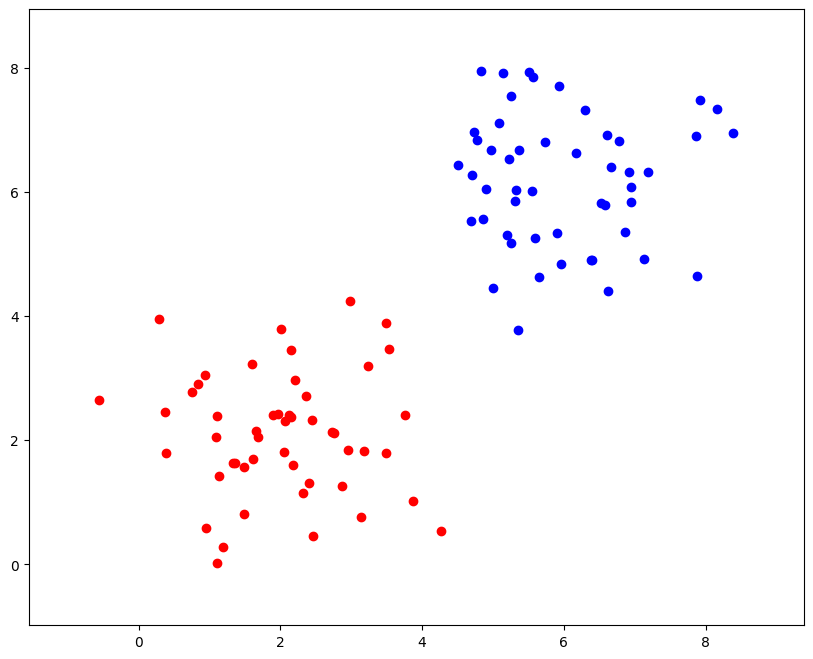

In [49]:
# Loading Database and split
dataset = np.genfromtxt("simple_classification.csv",delimiter=",",skip_header=1)  # read the CSV file "simple_regression.csv" and make it np.array with skipping header
X = dataset[:,:-1] 
y = dataset[:,-1]
y = np.where(y<=0,-1,1)
plotSVM(X,y) # plot the graph of points without SVM

##### Task 1a - Quadratic Programming SVM

In [50]:
# Task 1a - Quadratic programming
def QuadSVM(X,y,max_iter=5000):
    N, n = X.shape
    X = np.c_[X, np.ones(N)]
    P = np.eye(n+1)
    q = np.zeros(n+1)
    G = -np.diag(y) @ X
    h = -np.ones(X.shape[0])
    w = qps.solve_qp(P, q, G, h, solver='osqp',max_iter=max_iter)
    return w

Vector w from Quadratic program SVM is
[ 1.19553571  0.34700045 -6.52243901]
Plot of Quadratic programming SVM


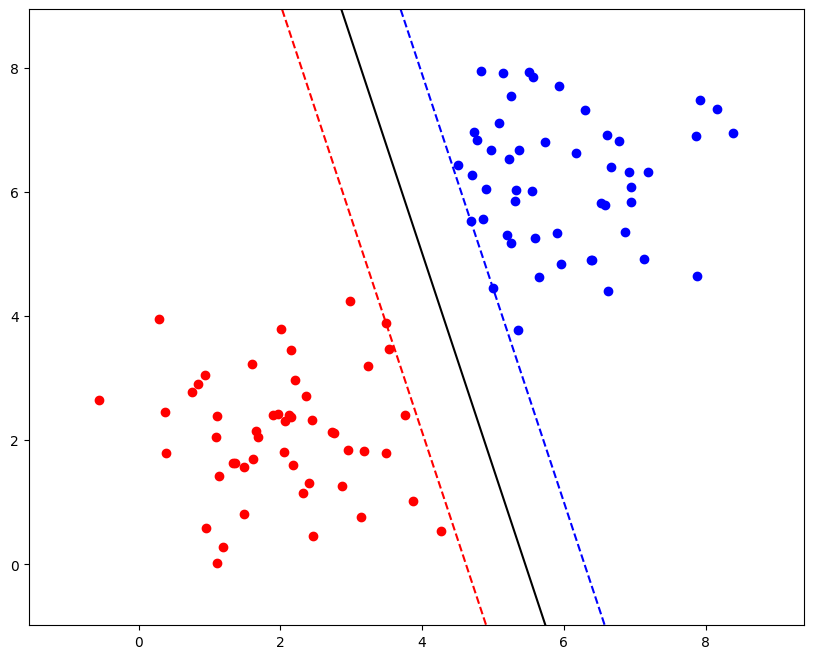

In [51]:
w_quad = QuadSVM(X,y)
print(f"Vector w from Quadratic program SVM is\n{w_quad}")
print("Plot of Quadratic programming SVM")
plotSVM(X,y,w_quad)

##### Task 1b - Dual Programming SVM

In [6]:
# Task 1b - Dual Programming SVM
def DualSVM(X,y,threshold=0.01,max_iter=1000):
    X = np.c_[X,np.ones(X.shape[0])]
    N, _ = X.shape
    G = np.diag(y) @ X
    P = 0.5 * G @ G.T
    q = -np.ones(N)
    GG = -np.eye(N)
    h = np.zeros(N)
    
    alpha = qps.solve_qp(P, q, GG, h, solver='osqp',max_iter=max_iter)
    w = 0.5 * G.T @ alpha
    
    support_vectors_idx = np.where(np.abs(alpha) >= threshold)[0] # Identify support vectors
    return w, alpha, support_vectors_idx


Vectors:

Vector w from Dual Program SVM is
[ 1.18637982  0.35081171 -6.50029701]

Vector alpha from Dual Program SVM is
[-9.77519521e-04 -4.39850134e-03 -1.18819216e-03  1.57605690e-03
  3.21073175e-04  9.64378728e-04  7.47703469e-03  1.49805349e-03
  1.06425185e-02 -2.29334579e-02 -1.38597442e-03 -1.24892486e-02
 -7.12111987e-04 -1.38940772e-03 -1.05996741e-03 -7.07258795e-03
  1.65694320e-03 -9.06673838e-06 -1.49110104e-03  4.82318510e-04
  1.57011585e-03  1.44397402e-02 -4.50376122e-03  1.31791506e-02
 -1.66174932e-03  1.62004197e-02 -1.13989872e-02  1.87476442e-02
 -2.07632498e-02 -4.50081803e-03  8.88743970e-04  2.12097352e-02
  3.49338491e-03 -4.17910588e-03 -3.07626836e-04  1.02521420e+01
  2.25138585e-03  2.81546713e-02  2.21772830e-03 -1.62900764e-03
 -4.06465053e-02 -3.54135058e-03  2.73942100e+01 -1.10910844e-03
  8.15404581e-04 -4.20196114e-03  5.06193042e+01  9.42788828e-03
 -9.04922584e-03 -2.86941676e-03 -4.57874321e-03  2.30912865e-02
 -2.33373733e-05  7.68972293e-03 

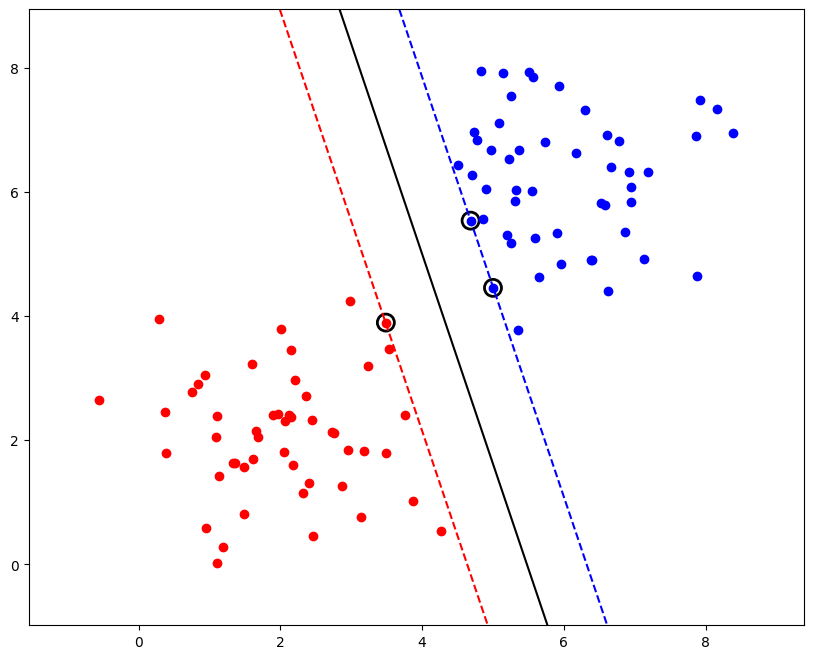

In [52]:
threshold = 0.1 # Selected because we want small support vectors but we don't want values too close to zero
w_dual, alpha, support_vectors_idx = DualSVM(X,y, threshold=threshold)
support_vectors = np.where(abs(alpha) >= threshold, abs(alpha),0)
print("\nVectors:\n")
print(f"Vector w from Dual Program SVM is\n{w_dual}\n")
print(f"Vector alpha from Dual Program SVM is\n{alpha}\n")
print(f"Support Vectors from Dual Program SVM is\n{support_vectors}\n")
print("Plot of Quadratic Programming SVM")
plotSVM(X, y, w_dual,support_vectors=support_vectors_idx)

**Task 2 - SVM Dual Program with Kernel**

In [210]:
# import for Task 2
import pandas as pd
import numpy as np
import qpsolvers as qps
import itertools
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import sys
sys.stderr = open(os.devnull, 'w') # Remove warnings

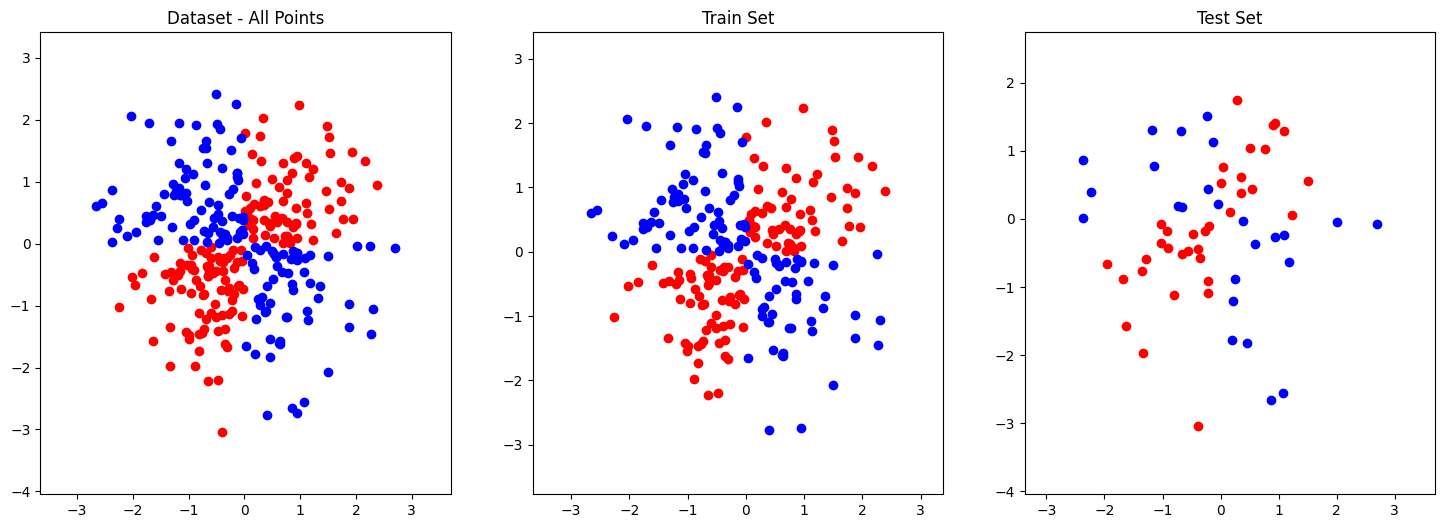

In [53]:
# Loading Database and split
dataset = np.genfromtxt("simple_nonlin_classification.csv",delimiter=",",skip_header=1)  # read the CSV file "simple_regression.csv" and make it np.array with skipping header
X = dataset[:,:-1] # take the samples
y = dataset[:,-1] # take the labels
y = np.where(y<=0,-1,1) # convert labels format to 1 or -1
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2,shuffle=False) # split the dataset for train and test
# plot the graph of points without SVM for each set
fig, axis = plt.subplots(1, 3,figsize=(18,6))
fig.subplots_adjust(wspace=0.2)
plotSVM(X,y,title='Dataset - All Points',pltAxis=axis[0]) 
plotSVM(X_trn,y_trn,title='Train Set',pltAxis=axis[1])
plotSVM(X_tst,y_tst,title='Test Set',pltAxis=axis[2])
plt.show()

In [7]:
# Kernel Functions

def polynomial_kernel(x, y, gamma:float=1.0, degree:int=2.0):
    return (gamma * np.dot(x, y.T) + 1) ** degree

def RBF_kernel(x, y, gamma:float=1.0):
    return np.e**(-(x - y).T @ (x - y))

In [55]:
def plot_classifier_kernel(alpha, X, y, ker, *args:float, s_point=None,s_circule=20,threshold=0.01,title:str=None):
    x_min = np.amin(X[:, 0])
    x_max = np.amax(X[:, 0])
    y_min = np.amin(X[:, 1])
    y_max = np.amax(X[:, 1])
    
    plt.axis([x_min-0.1, x_max+0.1, y_min-0.1, y_max+0.1])
    xx = np.linspace(x_min, x_max)
    yy = np.linspace(y_min, y_max)
    
    xx, yy = np.meshgrid(xx, yy)
    
    N, n = X.shape
    z = np.zeros(xx.shape)
    for i, j in itertools.product(range(xx.shape[0]), range(xx.shape[1])):
        z[i, j] = sum([y[k]*alpha[k]*ker(X[k,:], np.array([xx[i,j],yy[i,j]]), *args) for k in range(N)])
    
    plt.rcParams["figure.figsize"] = [10, 8]
                            
    plt.contour(xx, yy, z, levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['--','-', '--'])
    sv = np.argwhere(abs(alpha) >= threshold).reshape(-1)
    plt.scatter(X[sv,0], X[sv,1], s=s_circule, linewidth=2, facecolors='none', edgecolors='k')     
    plt.scatter(X[:, 0], X[:, 1], c=y, s=s_point, cmap=matplotlib.colors.ListedColormap(['blue','red']))
    plt.title(title)
    plt.show()

In [58]:
def svm_dual_kernel(X, y, ker, *args:float, threshold=None, max_iter=1000):
    N, n = X.shape
    P = np.empty((N, N))
    for i, j in itertools.product(range(N), range(N)):
        P[i, j] = y[i] * y[j] * ker(X[i,:], X[j,:], *args)
    P = 0.5*(P+P.T)
    P = 0.5*P
    q = -np.ones(N)
    GG = -np.eye(N)
    h = np.zeros(N)
    
    alpha = qps.solve_qp(P, q, GG, h, solver='osqp', max_iter=max_iter)
    
    if(threshold != None):
        sv = np.argwhere(alpha >= threshold).reshape(-1)
        weights = alpha[sv] * y[sv] * X[sv]
        return alpha, weights
    return alpha

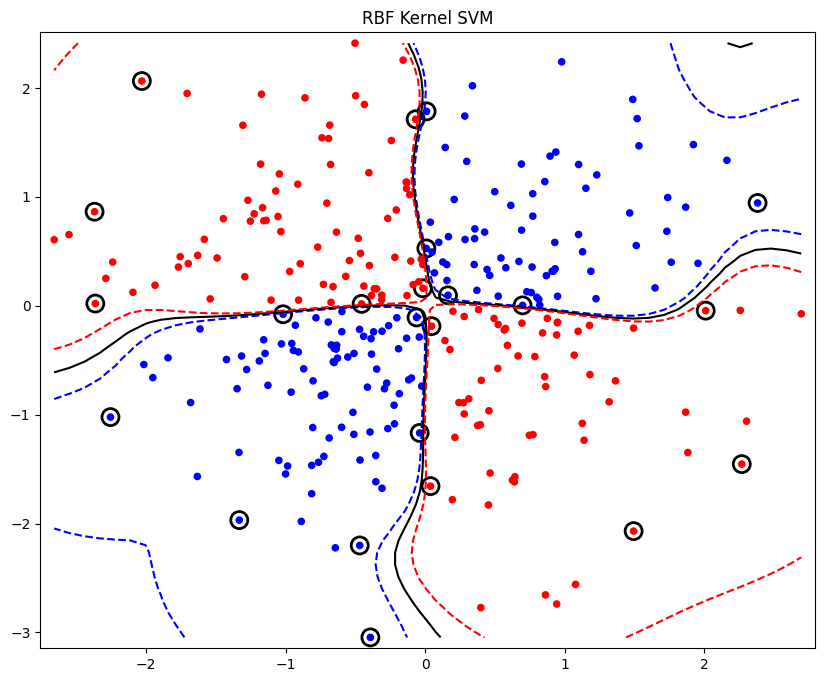

In [59]:
# RBF Kernel for ALL Dataset - Example
gamma = 0.005
alpha = svm_dual_kernel(X, y, RBF_kernel, gamma)
plot_classifier_kernel(alpha, X, y, RBF_kernel, gamma, s_point=20,s_circule=150,threshold=0.95,title='RBF Kernel SVM')

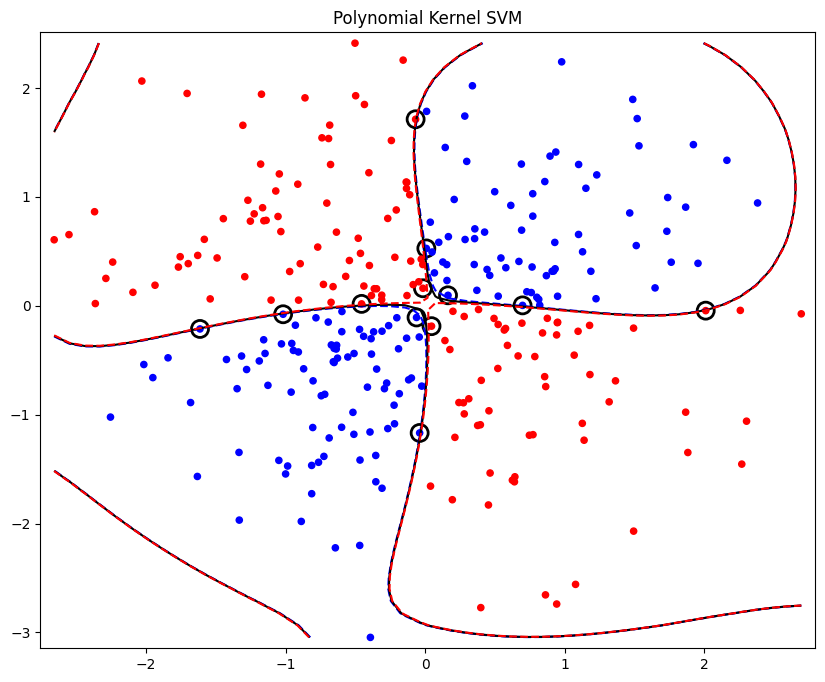

In [14]:
# Polynomial Kernel for ALL Dataset - Example
gamma, degree = 0.5 ,5
alpha, w = svm_dual_kernel(X, y, polynomial_kernel, gamma, degree,threshold=0.90)
plot_classifier_kernel(alpha, X, y, polynomial_kernel, gamma, degree, s_point=20,s_circule=150,threshold=0.90,title='Polynomial Kernel SVM')

In [15]:
def predict_labels(alpha, weights, X_train, y_train, X_tst, ker, *args:float):
    x = X_tst[:,0]
    y = X_tst[:,1]
    N, n = X_train.shape
    z = np.zeros(x.shape)
    for i in range(x.shape[0]):
        z[i] = sum([y_train[k]*alpha[k]*ker(X_train[k,:], np.array([x[i],y[i]]), *args) for k in range(N)])
    return np.sign(z)

In [16]:
# Grid Search for gamma value - RBF Kernel
gamma = np.linspace(1,151,41)
threshold = 0.9
scores = {} # key = ("Kernel",gamma,degree), value = accuacy_score
for gam in gamma:
    key = ("RBF Kernel", gam, None)
    alpha, weights = svm_dual_kernel(X, y, RBF_kernel, gam,threshold=threshold)
    predicted_labels = predict_labels(alpha, w, X_trn,y_trn, X_tst, polynomial_kernel, gam)
    score = accuracy_score(y_tst,predicted_labels)
    scores[key] = score
    print(f'{key} : {score}')
    
# Grid Search for gamma and degrees values - Polynomial Kernel
gamma = np.linspace(1,101,6)
degree = [2,4,6,8,10]
for gam in gamma:
    for deg in degree:
        key = ("Polynomial Kernel", gam, deg)
        alpha, weights = svm_dual_kernel(X, y, polynomial_kernel, gam, deg, threshold=threshold)
        predicted_labels = predict_labels(alpha, w, X_trn,y_trn, X_tst, polynomial_kernel, gam, deg)
        score = accuracy_score(y_tst,predicted_labels)
        scores[key] = score
        print(f'{key} : {score}')
    

('RBF Kernel', 1.0, None) : 0.45
('RBF Kernel', 4.75, None) : 0.6666666666666666
('RBF Kernel', 8.5, None) : 0.7
('RBF Kernel', 12.25, None) : 0.7333333333333333
('RBF Kernel', 16.0, None) : 0.7333333333333333
('RBF Kernel', 19.75, None) : 0.7333333333333333
('RBF Kernel', 23.5, None) : 0.75
('RBF Kernel', 27.25, None) : 0.7666666666666667
('RBF Kernel', 31.0, None) : 0.7666666666666667
('RBF Kernel', 34.75, None) : 0.7666666666666667
('RBF Kernel', 38.5, None) : 0.7666666666666667
('RBF Kernel', 42.25, None) : 0.7666666666666667
('RBF Kernel', 46.0, None) : 0.7666666666666667
('RBF Kernel', 49.75, None) : 0.7666666666666667
('RBF Kernel', 53.5, None) : 0.7833333333333333
('RBF Kernel', 57.25, None) : 0.8
('RBF Kernel', 61.0, None) : 0.8
('RBF Kernel', 64.75, None) : 0.8
('RBF Kernel', 68.5, None) : 0.8
('RBF Kernel', 72.25, None) : 0.8
('RBF Kernel', 76.0, None) : 0.7833333333333333
('RBF Kernel', 79.75, None) : 0.8
('RBF Kernel', 83.5, None) : 0.8
('RBF Kernel', 87.25, None) : 0.8
('

Plot the results to analyze


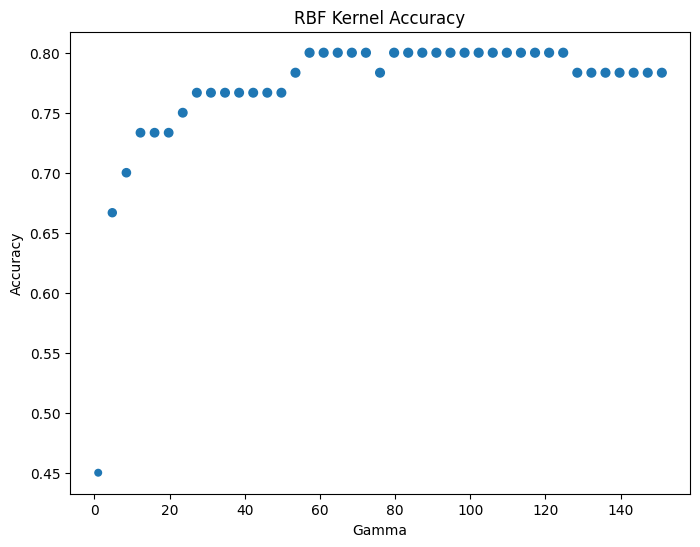

The Top 5 Scores In RBF Kernel:



,index,Accuracy,Kernel,Gamma
0,33,0.8,RBF Kernel,124.75
1,32,0.8,RBF Kernel,121.00
2,31,0.8,RBF Kernel,117.25
3,30,0.8,RBF Kernel,113.50
4,29,0.8,RBF Kernel,109.75


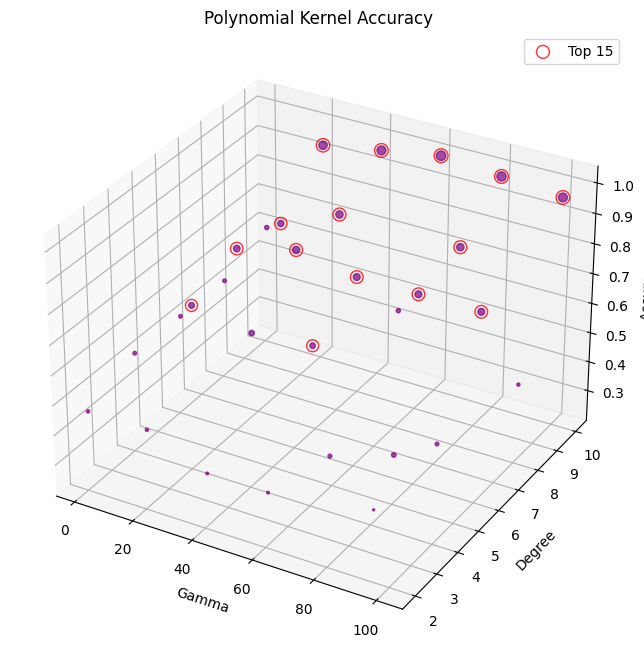

The Top 15 Scores In Polynomial Kernel:



,index,Accuracy,Kernel,Gamma,Degree
0,60,1.000000,Polynomial Kernel,61.0,10.0
1,65,0.983333,Polynomial Kernel,81.0,10.0
2,70,0.966667,Polynomial Kernel,101.0,10.0
3,55,0.966667,Polynomial Kernel,41.0,10.0
4,50,0.933333,Polynomial Kernel,21.0,10.0
5,64,0.866667,Polynomial Kernel,81.0,8.0
6,54,0.866667,Polynomial Kernel,41.0,8.0
7,53,0.866667,Polynomial Kernel,41.0,6.0
8,68,0.833333,Polynomial Kernel,101.0,6.0
9,63,0.833333,Polynomial Kernel,81.0,6.0


In [17]:
# Plot the results for analyze

# Settings
k_rbf = 5 # top k highest scores for RBF
k_poly = 15 # top k highest scores for Poly

# Create a DataFrame from the dictionary
data = pd.DataFrame(scores.values(), index=scores.keys(), columns=['Accuracy'])
data[['Kernel', 'Gamma', 'Degree']] = pd.DataFrame(data.index.tolist(), index=data.index)
data = data.reset_index(drop=True)
rbf_data = data[data['Kernel'] == 'RBF Kernel'].drop(columns=['Degree']) # DF for RBF
poly_data = data[data['Kernel'] == 'Polynomial Kernel'] # DF for Poly

# -------------- RBF Kernel --------------
# Create a 2D scatter plot for RBF Kernel
plt.figure(figsize=(8,6))
plt.scatter(rbf_data['Gamma'], rbf_data['Accuracy'], s=50 * rbf_data['Accuracy']) # point is bigger as accuracy is higher
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('RBF Kernel Accuracy')
plt.show()
# Get the idx of the top 10 highest scores in Poly Kernel
top_idx = rbf_data['Accuracy'].nlargest(k_rbf).index
print(f'The Top {k_rbf} Scores In RBF Kernel:\n')
display(rbf_data.sort_values(by=['Accuracy','Gamma'],ascending=False).reset_index().head(k_rbf)) # show the top K accuracy for RBF kernel
# -------------- RBF Kernel End --------------


# ----------- Polynomial Kernel -----------
# Create a 3D scatter plot for Polynomial Kernel
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=22, azim=45)  # Adjust the elevation and azimuth angles
ax.scatter(poly_data['Gamma'], poly_data['Degree'], poly_data['Accuracy'],c='purple', s=60 ** poly_data['Accuracy']*0.8,alpha=0.7) # point is bigger as accuracy is higher
ax.set_xlabel('Gamma')
ax.set_ylabel('Degree')
ax.set_zlabel('Accuracy')
ax.set_title('Polynomial Kernel Accuracy')

# Get the idx of the top 10 highest scores in Poly Kernel
top_idx = poly_data['Accuracy'].nlargest(k_poly).index

# Mark the K highest scores with red marker circule
ax.scatter(poly_data.loc[top_idx, 'Gamma'], poly_data.loc[top_idx, 'Degree'], poly_data.loc[top_idx, 'Accuracy'], 
            s=100 * poly_data.loc[top_idx, 'Accuracy'],alpha=0.8, edgecolors='red', facecolors='none', marker='o', label=f'Top {k_poly}')

# Add a legend
ax.legend()
# Show the plots
plt.show()

print(f'The Top {k_poly} Scores In Polynomial Kernel:\n')
display(poly_data.sort_values(by=['Accuracy','Degree','Gamma'],ascending=False).reset_index().head(k_poly)) # show the top K accuracy for Poly kernel
# -------------- Polynomial Kernel End --------------

**Conclusion:**
- RBF Kernel:
    - We can learn from the graph that Gamma value between 60-120 provide around 80% of accuracy
    - We can see from the table that the highest score is around Gamma equal to 100
    - We can learn from this data that RBF Kernel provide nice prediction for the dataset with good accuracy

- Polynomial Kernel:
    - It can be learned from the table that the gamma value is not a particularly significant factor on the accuracy of the model and in these cases a low gamma value looks slightly better
    - It can be seen that as the degree value increases, the results of the accuracy of the prediction improve up to maximum accuracy in some cases
    - In the table you can clearly see that as the degrees increase so does the value of the accuracy score

From the information we have seen here it can be assumed that a polynomial kernel is probably more appropriate

**Note:**
Because we used grid search for find the hyper parameters for wide scale of values
the Hyperparameters might be overfitted to the dataset.
In order to avoid this, if we have a larger dataset, we can also divide validation set in order to perform a test for matching hyperparameters as well

**Task 3 - Implement SVM Model with Kernel**

In [207]:
import numpy as np
import qpsolvers as qps
import itertools

In [271]:
# Task 3 - Implement SVM Model with Kernel
class SVM:
    
    def __init__(self, kernel='rbf', degree:int=3, C:float=1.0, gamma='scale'):
        # initialize C
        self._C = self.__set_C(C)
        # initialize degree
        self._degree = self.__set_degree(degree)
        # initialize gamma
        self._gamma = self.__set_gamma(gamma)
        # initialize kernel
        self._kernel = self.__kernel_set(kernel)
        
        # initialize rest of parameter to None
        self._weights = None
        self._alpha = None
        self._Xtrain = None
        self._Ytrain = None
    
    
    # Kernel static methods
    @staticmethod
    def polynomial_kernel(x, y, gamma:float=1.0, degree:int=2.0):
        return (gamma * np.dot(x, y.T) + 1) ** degree
    
    @staticmethod
    def RBF_kernel(x, y, gamma:float=1.0):
        return np.e**(-(x - y).T @ (x - y))
    
    @staticmethod
    def linear_kernel(x,y):
        return np.dot(x,y)
    
    # Parameters method
    def __kernel_parameters_pack(self):
        if self._kernel == self.RBF_kernel:
            return self._gamma
        
        if self._kernel == self.polynomial_kernel:
            return self._gamma, self._degree
            
    # Kernel Set method
    def __kernel_set(self, kernel):
        self.__unidentified_kernel = False
        if kernel == 'rbf':
            return self.RBF_kernel
        
        if kernel == 'poly':
            return self.polynomial_kernel
        
        if kernel == 'linear':
            return self.linear_kernel

        if isinstance(kernel, str):
            raise ValueError("kernel name is not reconized.")
        
        if callable(kernel):  # check for kernel function called
            print("unidentified kernel, Parameters degree and gamma are disabled")
            self.__unidentified_kernel = True
            return kernel
        else:
            raise TypeError("kernel is not reconized.")
        
    def __set_gamma(self, gamma):
        # Error handle
        if gamma not in ['scale', 'auto'] and (not isinstance(gamma, float) or gamma <= 0):
            raise ValueError("gamma must be a positive float or one of ['scale', 'auto'].")       
        return gamma 
        
    def __set_degree(self, degree):
        if degree <= 0:
            raise ValueError("degree must be a positive integer.")
        return degree
        
    def __set_C(self, C):
        if C <= 0:
            raise ValueError("C must be a positive number.")
        return C
        
    def __update_gamma(self):
        if isinstance(self._gamma, int):
            return
        if self._gamma == 'scale':
            self._gamma = 1 / (self.__n_features * self.__Xtrn.var())
        if self._gamma == 'auto':
            self._gamma = 1 / self.__n_features
            
    def fit(self, X, y, max_iter=5000, threshold=0.01):
        
        self.__Xtrn = X
        self.__Ytrn = y
        self.__N_samples, self.__n_features = X.shape
        
        self.__update_gamma()
        self.__kernel_parms_packed = self.__kernel_parameters_pack()
        
        # pre set Vectors and matrix for QP Solver
        P = np.empty((self.__N_samples, self.__N_samples))
        if isinstance(self.__kernel_parms_packed,tuple):
            for i, j in itertools.product(range(self.__N_samples), range(self.__N_samples)):
                P[i, j] = y[i] * y[j] * self._kernel(X[i,:], X[j,:], *self.__kernel_parms_packed)
        else:
            for i, j in itertools.product(range(self.__N_samples), range(self.__N_samples)):
                P[i, j] = y[i] * y[j] * self._kernel(X[i,:], X[j,:], self.__kernel_parms_packed)
    
        P = 0.5*(P+P.T)
        P = 0.5*P
        q = -np.ones(self.__N_samples)
        # Set GG and H matrix - the stack is for use C parameter for regularization
        GG = np.vstack((-np.eye(self.__N_samples), np.eye(self.__N_samples)))
        h = np.hstack((np.zeros(self.__N_samples),np.ones(self.__N_samples)*self._C))
        self._alpha = qps.solve_qp(P, q, GG, h, solver='osqp', max_iter=max_iter)
        # calculate weights
        sv = np.argwhere(self._alpha >= threshold).reshape(-1)
        self._weights = self._alpha[sv] * y[sv]
            
    
    def predict(self,X):
        return np.sign(self.decision_function(X))
    
    def decision_function(self, X):
        z = np.zeros(X.shape[0])
        if isinstance(self.__kernel_parms_packed,tuple):
            for i in range(X.shape[0]):
                z[i] = sum([self.__Ytrn[k]*self._alpha[k]*self._kernel(self.__Xtrn[k,:], X[i], *self.__kernel_parms_packed) for k in range(self.__N_samples)])
        else:
            for i in range(X.shape[0]):
                z[i] = sum([self.__Ytrn[k]*self._alpha[k]*self._kernel(self.__Xtrn[k,:], X[i], self.__kernel_parms_packed) for k in range(self.__N_samples)])
        return z
    
    def score(self, X, y):
        total_labels = y.shape[0]
        if X.shape[0] != total_labels:
            raise ValueError("X number of samples should be equal to number of y labels")
        corrects = np.sum(y == self.predict(X))
        return corrects / total_labels
        

**Task 4 - Cancer Breast Diagnostic Wisconsin Processed with SVM**

In [179]:
# imports for task 4
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


In [2]:
def plot_high_dim_data(data,labels, pltAxis=plt, title:str=None):
    # Perform dimensionality reduction using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    # Plot the reduced data on a 2D graph
    pltAxis.scatter(reduced_data[:, 0], reduced_data[:, 1],c=labels, cmap=matplotlib.colors.ListedColormap(['blue','red']) )
    if(pltAxis == plt):
        pltAxis.title(title)
        pltAxis.show()
    else:
        pltAxis.set_title(title)

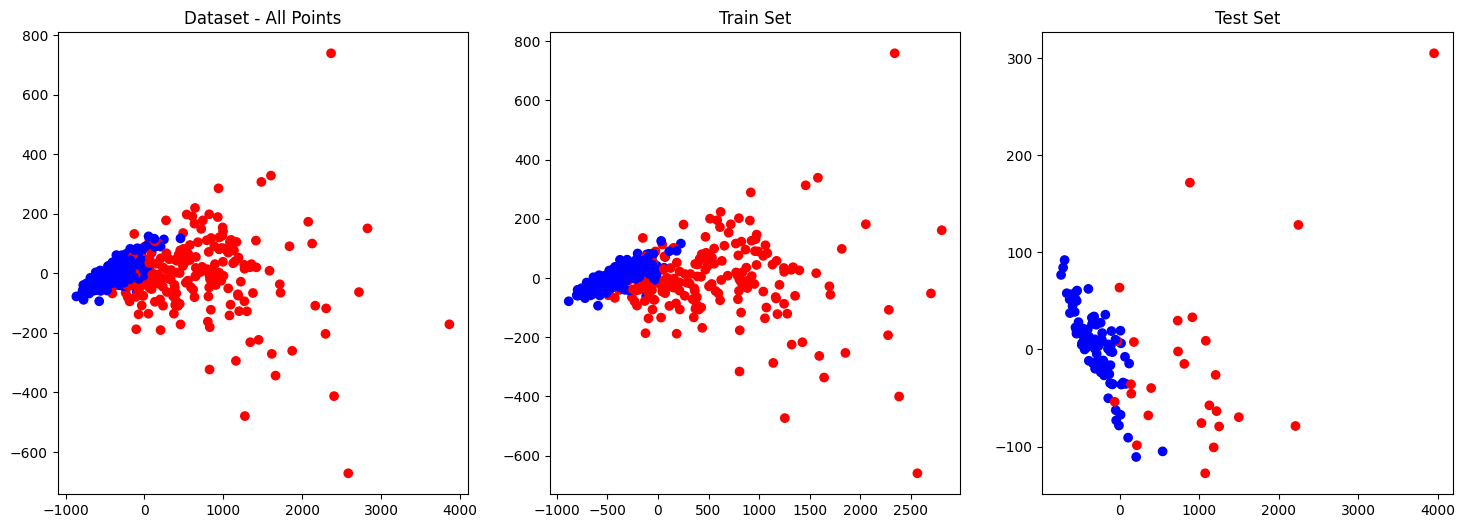

In [3]:
dataset = np.genfromtxt("Processed Wisconsin Diagnostic Breast Cancer.csv",delimiter=",",skip_header=1)  # read the CSV file "simple_regression.csv" and make it np.array with skipping header
X = dataset[:,:-1] # take the samples
y = dataset[:,-1] # take the labels
y = np.where(y<=0,-1,1) # convert labels format to 1 or -1
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2,shuffle=False) # split the dataset for train and test
# plot the graph of points without SVM for each set
fig, axis = plt.subplots(1, 3,figsize=(18,6))
fig.subplots_adjust(wspace=0.2)
plot_high_dim_data(X,y,title='Dataset - All Points',pltAxis=axis[0]) 
plot_high_dim_data(X_trn,y_trn,title='Train Set',pltAxis=axis[1])
plot_high_dim_data(X_tst,y_tst,title='Test Set',pltAxis=axis[2])
plt.show()

In [272]:
model = SVM(kernel='poly',C=1,degree=9)
model.fit(X_trn,y_trn,threshold=0.9)
pred = model.predict(X_tst)
dec = model.decision_function(X_tst)
score = model.score(X_tst,y_tst)